# 1. Data Preprocessing

In the data preprocessing step, missing values are identified, feature selection is performed, and if necessary, data transformation is carried out.


In [21]:
import pandas as pd
import os

# Directory containing the CSV files
directory = 'C:/Users/sh/Desktop/MTH-410-Midterm-Project/MachineLearningCVE'


In [22]:
files = os.listdir()
data = pd.concat(map(pd.read_csv, files), ignore_index=True)

PermissionError: [Errno 13] Permission denied: '410Assignment'

In [ ]:
# List files in the directory to ensure we are in the correct path
!dir

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [19]:
# Read all CSV files, and concatenate them into one dataframe
files = os.listdir()
data = pd.concat(map(pd.read_csv, files), ignore_index=True)

PermissionError: [Errno 13] Permission denied: '410Assignment'

In [ ]:
# Print the number of rows and columns in the data
rows, cols = data.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 2830743
Number of columns: 79


In [ ]:
# Check the number of duplicated values
duplicates = data[data.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 308381


In [ ]:
# Drop duplicate rows and print the new shape of the dataframe
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [ ]:
# Columns of the data
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Remove any leading or trailing whitespace from the column names
data.columns = [column.strip() for column in data.columns]
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
# Identify columns that contain missing values.
data.columns[data.isnull().any()]

Index(['Flow Bytes/s'], dtype='object')

In [ ]:
# Finding infinite values in the data and converting them to NaN
data = data.replace([np.inf, -np.inf], np.nan)
# Dropping NaN values
data.dropna(inplace=True)

In [ ]:
# Drop columns where all values are the same (constant columns)
for col in data.columns:
    if data[col].nunique() == 1:
        data.drop(col, inplace=True, axis=1)

In [ ]:
data.shape

(2520798, 71)

In [ ]:
data.reset_index(drop=True, inplace=True)

## 1.1 PCA
  PCA is a statistical method that transforms high-dimensional data into a lower-dimensional space, where the new dimensions, called principal components, capture the maximum variance in the original data. These principal components are orthogonal to each other, meaning they are uncorrelated.

In [ ]:
# Separate labels from the data
data_labels = data['Label']
data_no_labels = data.drop('Label', axis=1, inplace=False)
data_features = data_no_labels.columns.tolist()
data_no_labels

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,61374,61,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2520794,61378,72,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2520795,61375,75,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2520796,61323,48,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
# Use PCA to see how much of the total variance in the data is explained by each principal component (explained variance ratio)
pca_test = PCA().fit(data_no_labels)
pca_test.explained_variance_ratio_.round(3)

array([0.628, 0.11 , 0.107, 0.076, 0.041, 0.02 , 0.008, 0.003, 0.001,
       0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

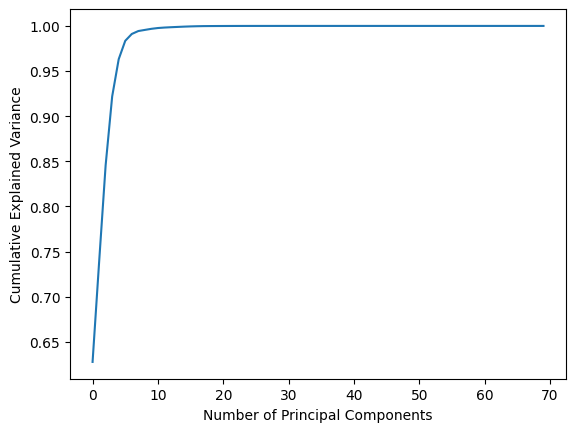

In [ ]:
# Plot the cumulative explained variance to decide the number of components to keep
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

** Explained variance ratios shows that the first 7 PCA components actually describes most (99%) of the variation within the dataset. **

In [ ]:
# PCA analysis indicates that the first 7 components explain most of the variance
pca = PCA(n_components= 7)

principal_components = pca.fit_transform(data_no_labels)
principal_components

array([[-34524545.23275307,  -2943289.76700911,    -36714.46687252, ...,
          1088826.51162002,   -664001.00543978,   -340701.77747248],
       [-34564042.87903729,  -2956609.28788448,    -37323.77566544, ...,
          1092772.68291038,   -677131.5500173 ,   -356403.4154613 ],
       [-34604199.11321164,  -3023621.02061505,    -37756.26069434, ...,
          1064942.61547693,   -674375.84210081,   -345387.41876885],
       ...,
       [-34556269.92755941,  -2945504.47833542,    -36740.26073928, ...,
          1096933.19331255,   -678699.49120678,   -357186.85674408],
       [-34557118.2176176 ,  -2946696.14605211,    -36777.67480553, ...,
          1096530.73586938,   -678502.28649271,   -357118.68447341],
       [-34556434.0353383 ,  -2945719.78212649,    -36741.95921449, ...,
          1096856.5657531 ,   -678671.61501542,   -357176.85249947]])

In [ ]:
# Create a dataframe for principal components
pc_feature_names = []
for i in range(7):
  pc_feature_names.append(f"Principal Component {i+1}")
pc_feature_names

['Principal Component 1',
 'Principal Component 2',
 'Principal Component 3',
 'Principal Component 4',
 'Principal Component 5',
 'Principal Component 6',
 'Principal Component 7']

In [ ]:
data_pc = pd.DataFrame(data = principal_components, columns = pc_feature_names)
data_pc

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7
0,-3.452455e+07,-2.943290e+06,-36714.466873,-1.771889e+06,1.088827e+06,-664001.005440,-340701.777472
1,-3.456404e+07,-2.956609e+06,-37323.775665,-7.327233e+05,1.092773e+06,-677131.550017,-356403.415461
2,-3.460420e+07,-3.023621e+06,-37756.260694,3.980327e+06,1.064943e+06,-674375.842101,-345387.418769
3,-3.452799e+07,-2.946440e+06,-37577.527724,-1.106957e+06,1.091988e+06,-689140.289215,-339531.876454
4,-3.460402e+07,-3.024378e+06,-37712.497367,3.997963e+06,1.064280e+06,-674917.319629,-344697.262766
...,...,...,...,...,...,...,...
2520793,-3.455663e+07,-2.945989e+06,-36744.015252,-1.575567e+06,1.096764e+06,-678638.190763,-357166.425719
2520794,-3.455634e+07,-2.945592e+06,-36740.942476,-1.605633e+06,1.096903e+06,-678688.542183,-357183.346348
2520795,-3.455627e+07,-2.945504e+06,-36740.260739,-1.612302e+06,1.096933e+06,-678699.491207,-357186.856744
2520796,-3.455712e+07,-2.946696e+06,-36777.674806,-1.522222e+06,1.096531e+06,-678502.286493,-357118.684473


In [ ]:
# Add the labels back to the DataFrame
data_pc = pd.concat([data_pc, data_labels], axis = 1)
data_pc

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Label
0,-3.452455e+07,-2.943290e+06,-36714.466873,-1.771889e+06,1.088827e+06,-664001.005440,-340701.777472,BENIGN
1,-3.456404e+07,-2.956609e+06,-37323.775665,-7.327233e+05,1.092773e+06,-677131.550017,-356403.415461,BENIGN
2,-3.460420e+07,-3.023621e+06,-37756.260694,3.980327e+06,1.064943e+06,-674375.842101,-345387.418769,BENIGN
3,-3.452799e+07,-2.946440e+06,-37577.527724,-1.106957e+06,1.091988e+06,-689140.289215,-339531.876454,BENIGN
4,-3.460402e+07,-3.024378e+06,-37712.497367,3.997963e+06,1.064280e+06,-674917.319629,-344697.262766,BENIGN
...,...,...,...,...,...,...,...,...
2520793,-3.455663e+07,-2.945989e+06,-36744.015252,-1.575567e+06,1.096764e+06,-678638.190763,-357166.425719,BENIGN
2520794,-3.455634e+07,-2.945592e+06,-36740.942476,-1.605633e+06,1.096903e+06,-678688.542183,-357183.346348,BENIGN
2520795,-3.455627e+07,-2.945504e+06,-36740.260739,-1.612302e+06,1.096933e+06,-678699.491207,-357186.856744,BENIGN
2520796,-3.455712e+07,-2.946696e+06,-36777.674806,-1.522222e+06,1.096531e+06,-678502.286493,-357118.684473,BENIGN


In [ ]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
data_pc['Label'] = label_encoder.fit_transform(data_pc['Label'])

print("\nDataFrame with Encoded Labels:")
data_pc


DataFrame with Encoded Labels:


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Label
0,-3.452455e+07,-2.943290e+06,-36714.466873,-1.771889e+06,1.088827e+06,-664001.005440,-340701.777472,0
1,-3.456404e+07,-2.956609e+06,-37323.775665,-7.327233e+05,1.092773e+06,-677131.550017,-356403.415461,0
2,-3.460420e+07,-3.023621e+06,-37756.260694,3.980327e+06,1.064943e+06,-674375.842101,-345387.418769,0
3,-3.452799e+07,-2.946440e+06,-37577.527724,-1.106957e+06,1.091988e+06,-689140.289215,-339531.876454,0
4,-3.460402e+07,-3.024378e+06,-37712.497367,3.997963e+06,1.064280e+06,-674917.319629,-344697.262766,0
...,...,...,...,...,...,...,...,...
2520793,-3.455663e+07,-2.945989e+06,-36744.015252,-1.575567e+06,1.096764e+06,-678638.190763,-357166.425719,0
2520794,-3.455634e+07,-2.945592e+06,-36740.942476,-1.605633e+06,1.096903e+06,-678688.542183,-357183.346348,0
2520795,-3.455627e+07,-2.945504e+06,-36740.260739,-1.612302e+06,1.096933e+06,-678699.491207,-357186.856744,0
2520796,-3.455712e+07,-2.946696e+06,-36777.674806,-1.522222e+06,1.096531e+06,-678502.286493,-357118.684473,0


In [ ]:
# Check unique values in encoded labels and original labels
data_pc['Label'].unique()

array([ 0,  6,  5,  4,  3,  8,  7, 11, 12, 14, 13,  9,  1, 10,  2])

In [ ]:
data_labels.unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed', 'FTP-Patator', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

# 2. Exploratory Data Analysis

In [ ]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,...,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,...,6.009478e+00,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,...,6.744150e+02,1.149758e+06,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062200e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.333340e+06,6.000000e+00,5.000000e+00,3.320000e+02,9.970000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
# Compute the correlation matrix
corr = data.corr(numeric_only = True)

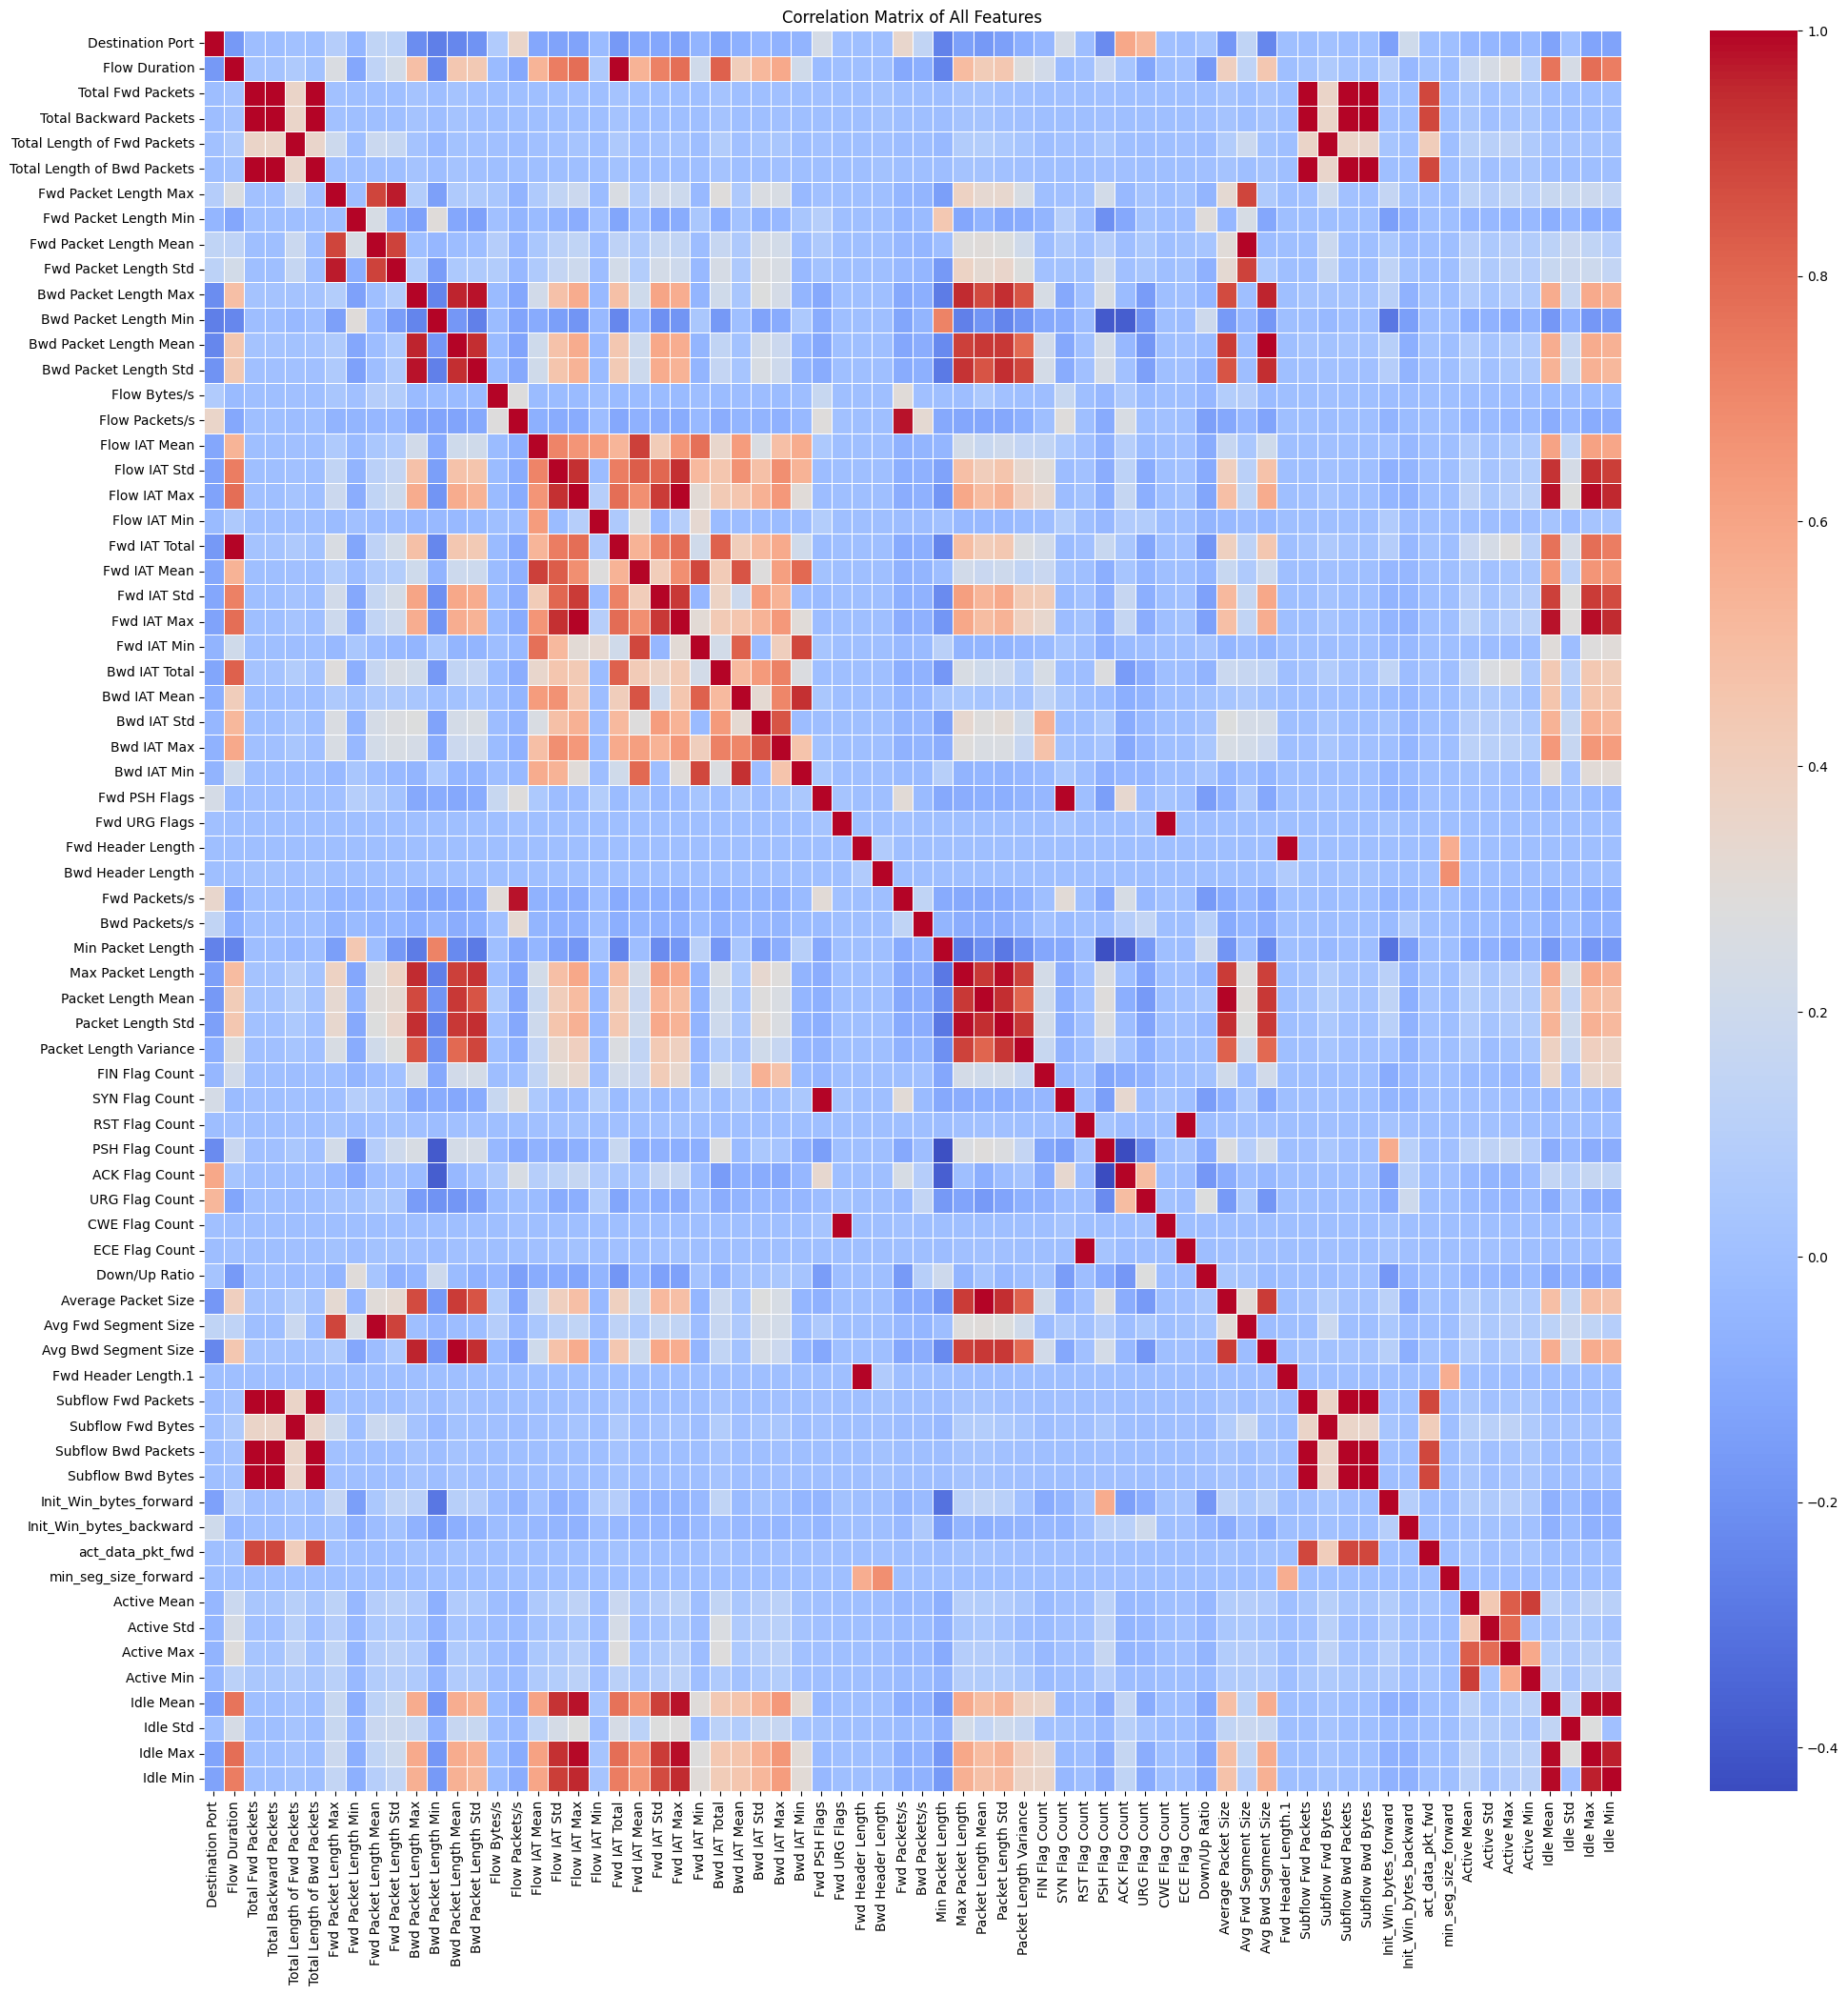

In [ ]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix of All Features')
plt.show()

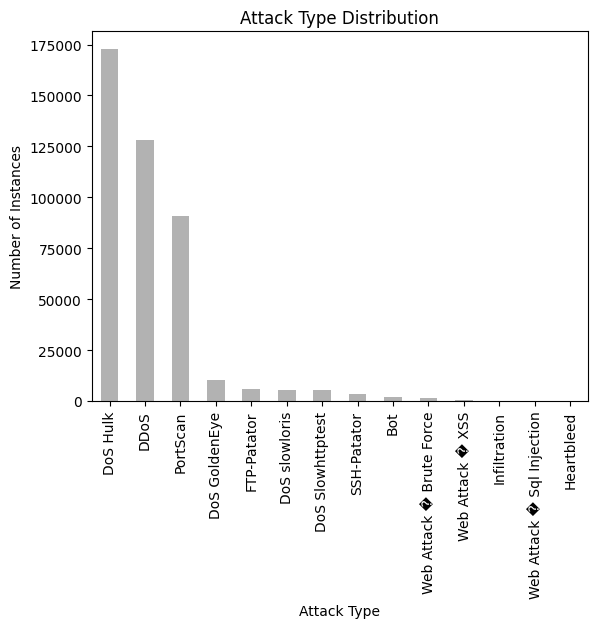

In [ ]:
# Bar plot showing the distribution of attack types (excluding 'BENIGN')
data[data['Label'] != 'BENIGN']['Label'].value_counts().plot(kind='bar', color="black", alpha=0.3)

# Set the title and labels for the plot
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Number of Instances')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()

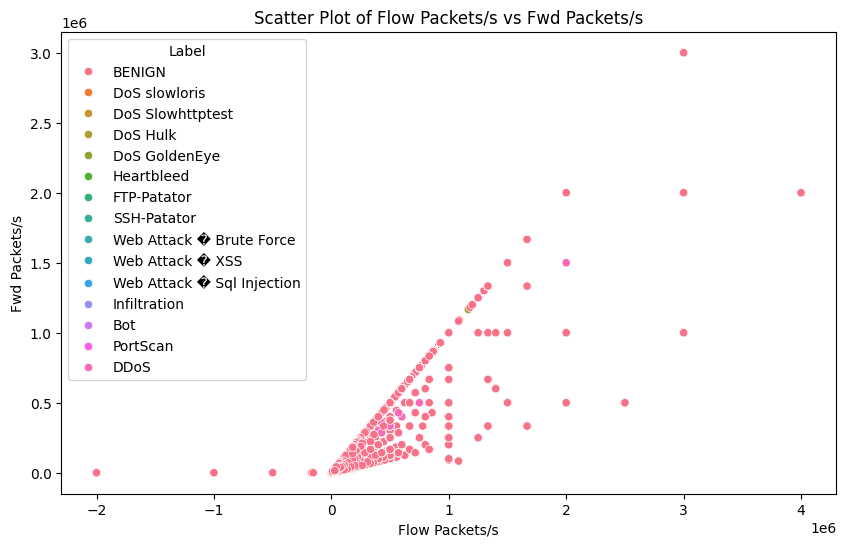

In [ ]:
# Scatter plot of 'Flow Packets/s' vs 'Fwd Packets/s' colored by label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flow Packets/s', y='Fwd Packets/s', hue='Label', data=data)
plt.title('Scatter Plot of Flow Packets/s vs Fwd Packets/s')
plt.show()

In [ ]:
# Feature importance analysis using RandomForestClassifier

# Use a sample of the dataset
sample_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

X = sample_data.drop('Label', axis=1)
y = sample_data['Label']

# Train model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

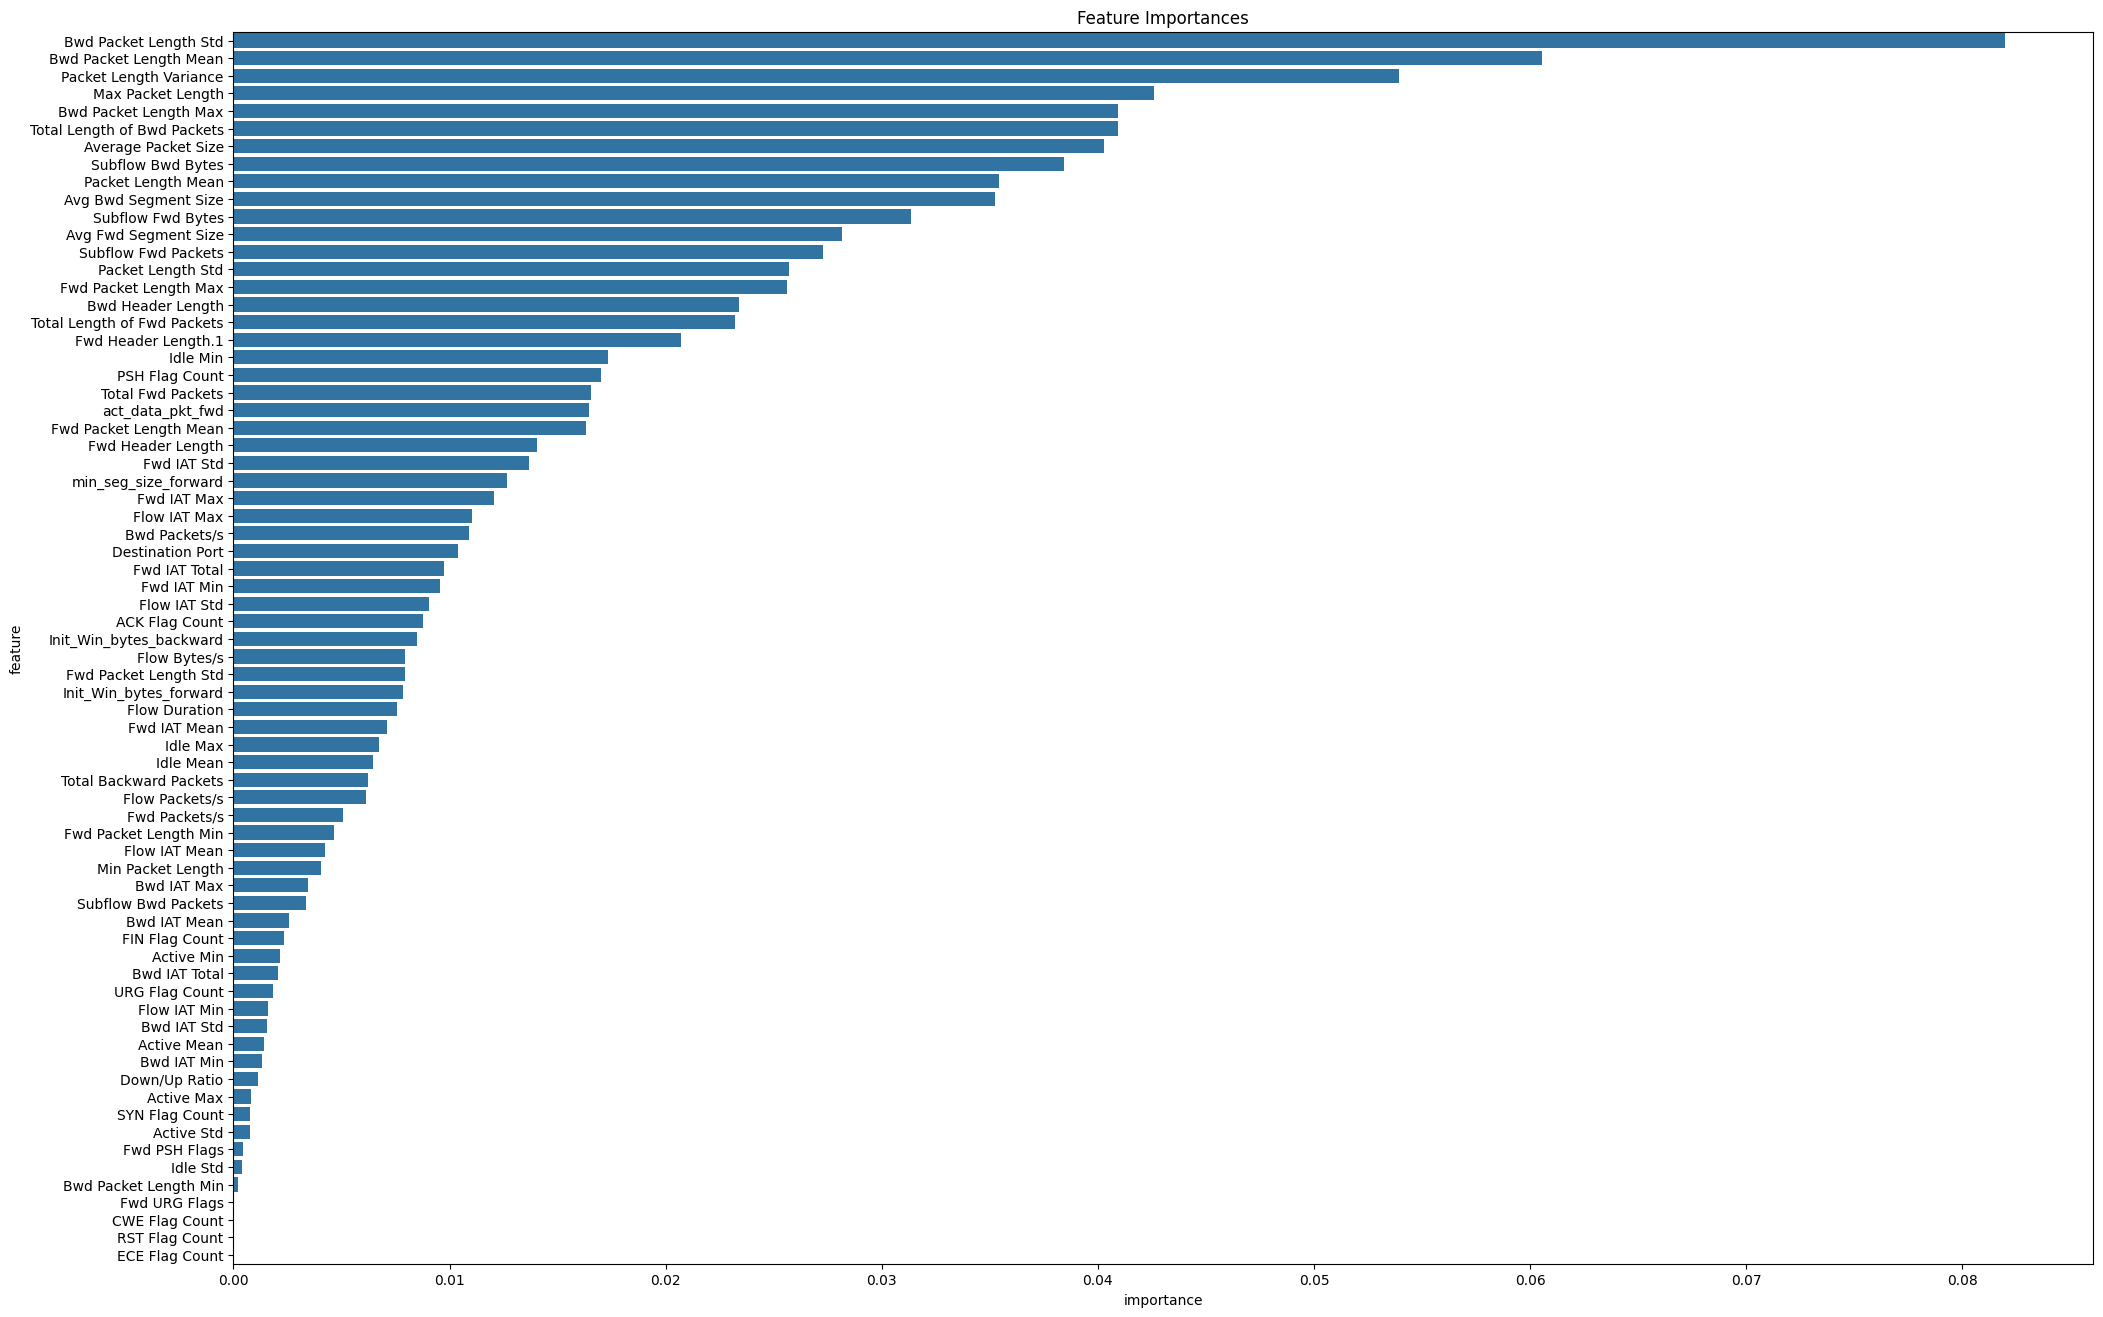

In [ ]:
# Plot feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(24, 16))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


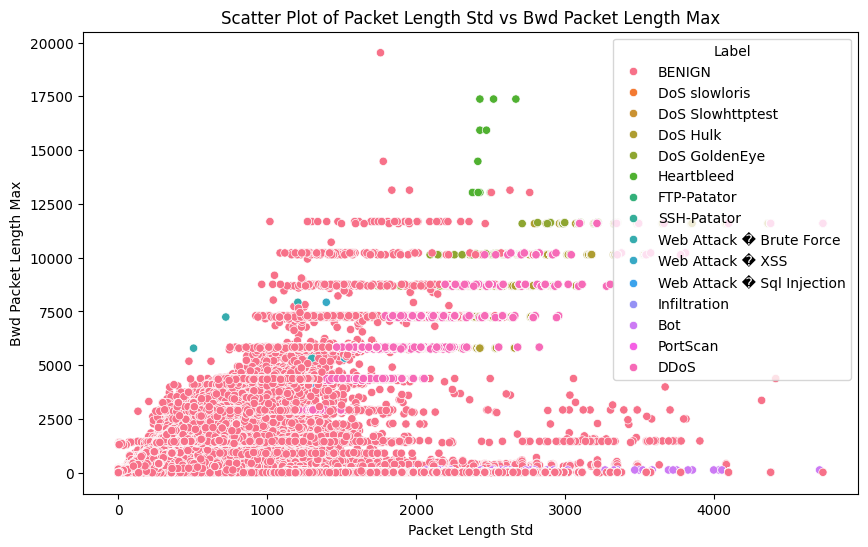

In [ ]:
# Additional scatter plot and box plot for exploratory analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Packet Length Std', y='Bwd Packet Length Max', hue='Label', data=data)
plt.title('Scatter Plot of Packet Length Std vs Bwd Packet Length Max')
plt.show()

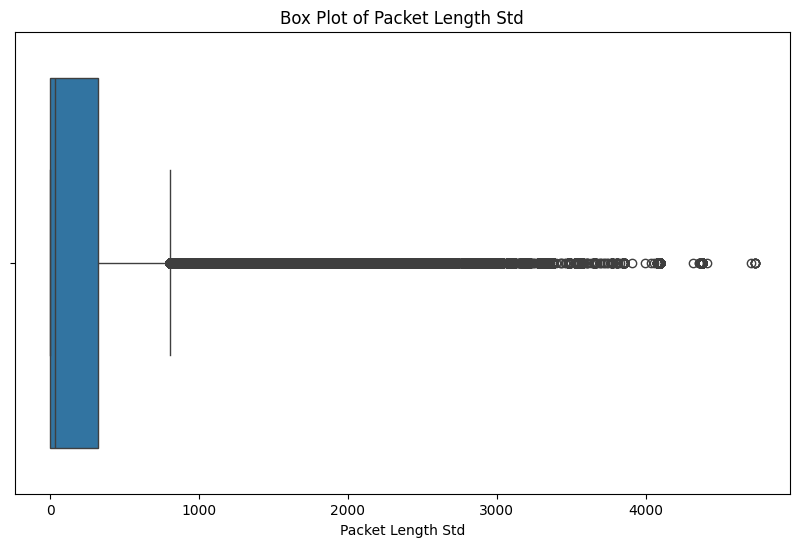

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Packet Length Std'])
plt.title('Box Plot of Packet Length Std')
plt.show()

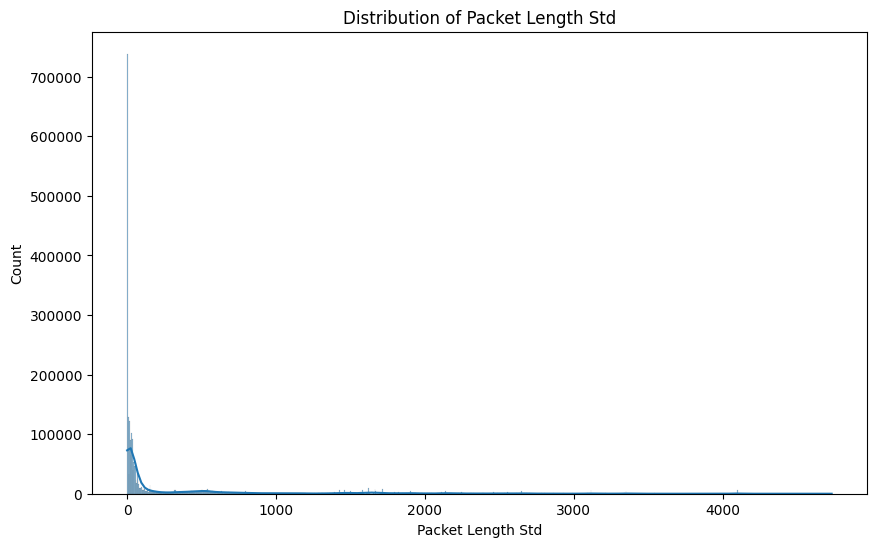

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Packet Length Std'], kde=True)
plt.title('Distribution of Packet Length Std')
plt.show()

##3. Applying Data Mining Techniques

In [ ]:
# Split the data into features and labels
X = data_pc.drop('Label', axis=1)
y = data_pc['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####KNN

In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict the labels of the test data
knn_predictions = knn.predict(X_test)

# Calculate the accuracy of the model
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [ ]:
# Print the accuracy
print(f'Model Accuracy: {knn_accuracy}')
print('Classification Report:')
print(classification_report(y_test, knn_predictions))

Model Accuracy: 0.9934782608695653
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418977
           1       0.68      0.61      0.64       419
           2       0.98      0.98      0.98     25578
           3       0.96      0.97      0.97      2078
           4       0.98      0.98      0.98     34373
           5       0.94      0.96      0.95      1017
           6       0.99      0.94      0.96      1086
           7       0.98      0.96      0.97      1195
           8       1.00      0.67      0.80         3
           9       1.00      0.14      0.25         7
          10       0.98      1.00      0.99     18329
          11       0.94      0.92      0.93       645
          12       0.66      0.69      0.68       301
          13       0.00      0.00      0.00         5
          14       0.44      0.36      0.40       147

    accuracy                           0.99    504160
   macro avg       0.83      0.74      0.77    504160
weighted avg       0.99   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


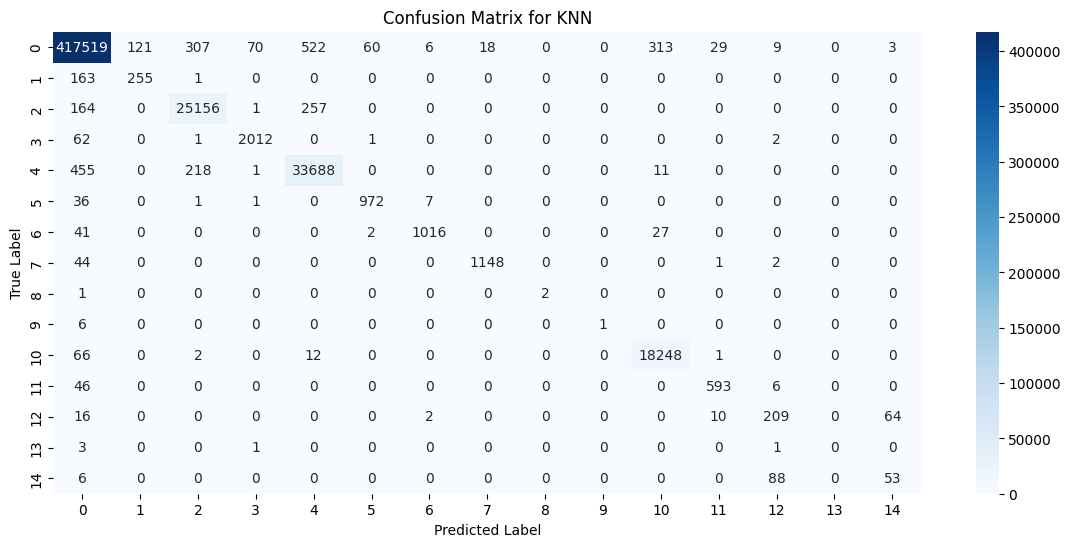

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(14, 6))
knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

####RF Classification using data_pc

In [ ]:
#Train RF model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
# Predict the labels of the test data
rf_predictions = rf.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [ ]:
# Print the accuracy
print(f'Model Accuracy: {rf_accuracy}')
print('Classification Report:')
print(classification_report(y_test, rf_predictions))

Model Accuracy: 0.9455549825452237
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97    418977
           1       0.00      0.00      0.00       419
           2       0.92      0.95      0.93     25578
           3       0.98      0.75      0.85      2078
           4       0.96      0.90      0.93     34373
           5       0.94      0.80      0.86      1017
           6       0.99      0.84      0.91      1086
           7       0.99      0.65      0.79      1195
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00     18329
          11       0.99      0.89      0.94       645
          12       0.00      0.00      0.00       301
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00       147

    accuracy                           0.95    504160
   macro avg       0.51      0.45      0.48    504160
weighted avg       0.91   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


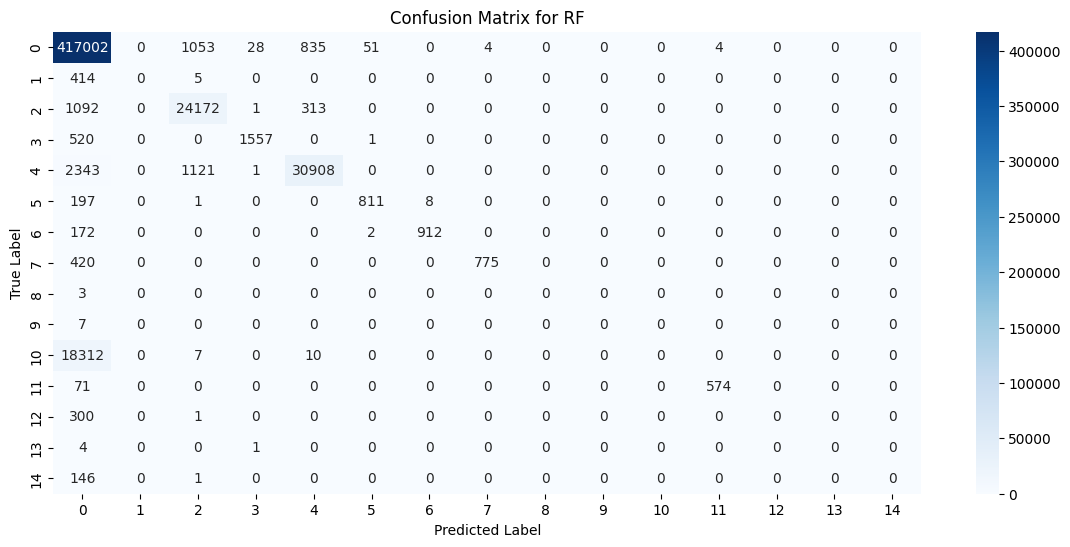

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(14, 6))
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

####Naive Bayes

In [ ]:
#Train Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict the labels of the test data
gnb_predictions = gnb.predict(X_test)

# Calculate the accuracy of the model
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

In [ ]:
# Print the accuracy
print(f'Model Accuracy: {gnb_accuracy}')
print('Classification Report:')
print(classification_report(y_test, gnb_predictions))

Model Accuracy: 0.13905902887972071
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09    418977
           1       0.00      0.04      0.00       419
           2       0.23      0.11      0.14     25578
           3       0.13      0.49      0.21      2078
           4       0.75      0.80      0.77     34373
           5       0.00      0.00      0.00      1017
           6       0.04      0.57      0.07      1086
           7       0.26      0.65      0.37      1195
           8       0.40      0.67      0.50         3
           9       0.00      0.00      0.00         7
          10       0.06      0.97      0.11     18329
          11       0.20      0.91      0.33       645
          12       0.01      0.80      0.02       301
          13       0.00      0.60      0.00         5
          14       0.00      0.00      0.00       147

    accuracy                           0.14    504160
   macro avg       0.

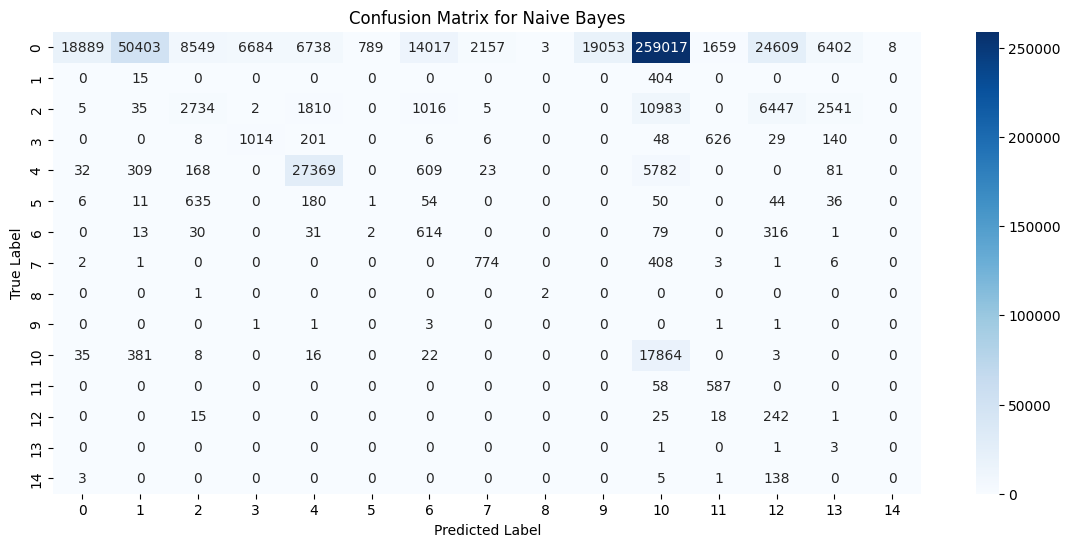

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(14, 6))
gnb_cm = confusion_matrix(y_test, gnb_predictions)
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("Dataset labels:", data_labels.unique())
print("Encoded labels:", data_pc['Label'].unique())

Dataset labels: ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed' 'FTP-Patator' 'SSH-Patator' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'Infiltration' 'Bot'
 'PortScan' 'DDoS']
Encoded labels: [ 0  6  5  4  3  8  7 11 12 14 13  9  1 10  2]


In [ ]:
accuracy_data = {
    'Model': ['KNN', 'Random Forest', 'Gaussian Naive Bayes'],
    'Accuracy': [knn_accuracy, rf_accuracy, gnb_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_data)

print(accuracy_df)

                  Model  Accuracy
0                   KNN  0.993478
1         Random Forest  0.945555
2  Gaussian Naive Bayes  0.139059


KNN, with its accuracy score of 0.99, was selected for analyzing the CICIDS2017 dataset due to its simplicity, effectiveness, and suitability for cybersecurity tasks. Reducing the dataset to 7 principal components with PCA enhances KNN's ability to effectively manage high-dimensional data and address multi-class classification challenges. Its transparency aids in understanding decisions, crucial for cybersecurity. In comparison, Random Forest (RF) achieved an accuracy of 0.94, demonstrating its robustness in handling complex datasets and providing competitive performance. Despite its lower accuracy score of 0.13, Gaussian Naive Bayes (GNB) remains relevant for its simplicity and speed in processing data, albeit with limited capacity to capture complex relationships. These models collectively contribute to a comprehensive analysis of network traffic, with KNN standing out as the most accurate and interpretable option for intrusion detection and anomaly recognition in the CICIDS2017 dataset.